In [1]:
import snapatac2 as snap
import numpy as np
import os
import scanpy as sc
import pandas as pd
snap.__version__


'2.8.0'

In [2]:
files = [
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW45A_HIP/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC48D_HIP/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC39C_HIP/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/FW57B_AMY/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC39A_HIP/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC37A_HIP/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW51A_PFC/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC52E_AMY/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW47A_HIP/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW47A_AMY/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW51A_AMY/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC50B_HIP/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC50B_AMY/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC50B_PFC/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW51A_HIP/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW47A_PFC/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC52E_PFC/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/W26_0_2_Perfrontal/',
'/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/W25_0_1_Perfrontal/'
]
files


['/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW45A_HIP/',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC48D_HIP/',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC39C_HIP/',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/FW57B_AMY/',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC39A_HIP/',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC37A_HIP/',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW51A_PFC/',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC52E_AMY/',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW47A_HIP/',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW47A_AMY/',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW51A_AMY/',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC50B_HIP/',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC50B_AMY/',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC50B_PFC/',
 '/data1st2/hannan_25/data/snATAC_

In [ ]:
files = [ os.path.join(fl,"outs","fragments.tsv.gz") for fl in files]

In [ ]:
files

In [ ]:
%%time
# fragment_file = "/data2st1/junyi/WT_W26/outs/fragments.tsv.gz"
# chromzie_file = "/data2st1/junyi/ref/mm10.chrom.sizes"

# Load the fragment file
data = snap.pp.import_fragments(
    files,
    file = [  "/data2st1/junyi/output/atac0416/"+fl.split("/")[-3]+".h5ad" for fl in files]
    , chrom_sizes=snap.genome.mm10, 
    min_num_fragments=1000,
    sorted_by_barcode=False)


In [ ]:
adatas= data

In [ ]:
adatas

In [ ]:
%%time
snap.metrics.tsse(adatas, snap.genome.mm10)


In [ ]:
fig = snap.pl.tsse(adatas[0], interactive=False)

In [ ]:
type(fig)

In [ ]:
from PIL import Image
figures  = []
names = []
for data in adatas:
    fig = snap.pl.tsse(data, interactive=False)
    print(data.filename)
    display(fig)
    # figures.append(fig)
    # names.append(data.filename.split("/")[-1].split(".")[0])

In [ ]:
snap.pp.filter_cells(adatas, min_counts=3000, min_tsse=3, max_counts=100000)
snap.pp.add_tile_matrix(adatas, bin_size=5000)
snap.pp.select_features(adatas, n_features=50000)
# snap.pp.scrublet(adatas)
# snap.pp.filter_doublets(adatas)


In [ ]:
data = snap.AnnDataSet(
    adatas=[(name, adata) for (name), adata in zip(files, adatas)],
    filename="output/atac0416/mouse_brain.h5ads"
)

In [ ]:
print(f'Number of cells: {data.n_obs}')
print(f'Number of unique barcodes: {np.unique(data.obs_names).size}')


In [ ]:
data.var

In [ ]:
unique_cell_ids = [sa + ':' + bc for sa, bc in zip(data.obs['sample'], data.obs_names)]
data.obs_names = unique_cell_ids
assert data.n_obs == np.unique(data.obs_names).size


In [ ]:
snap.pp.select_features(data, n_features=50000)


In [ ]:
%%time
snap.tl.spectral(data)

In [ ]:
%%time
snap.tl.umap(data)


In [ ]:
data.obs['sample'][0].split("/")[-3]

In [ ]:
data.obs['sample'] = [sa.split("/")[-3] for sa in data.obs['sample']]

In [ ]:
data

In [ ]:
snap.pl.umap(data,color='sample')


In [ ]:
data.close()
data


In [11]:
adfiles={
'MC37A_AMY':'/data2st1/junyi/output/atac0416/MC37A_AMY.h5ad',
'MC39C_HIP':'/data2st1/junyi/output/atac0416/MC39C_HIP.h5ad',
'MC48D_HIP':'/data2st1/junyi/output/atac0416/MC48D_HIP.h5ad',
'MC50B_AMY':'/data2st1/junyi/output/atac0416/MC50B_AMY.h5ad',
'MC50B_HIP':'/data2st1/junyi/output/atac0416/MC50B_HIP.h5ad',
'MC50B_PFC':'/data2st1/junyi/output/atac0416/MC50B_PFC.h5ad',
'MC52E_AMY':'/data2st1/junyi/output/atac0416/MC52E_AMY.h5ad',
'MC52E_PFC':'/data2st1/junyi/output/atac0416/MC52E_PFC.h5ad',
'MW45A_HIP':'/data2st1/junyi/output/atac0416/MW45A_HIP.h5ad',
'MW47A_AMY':'/data2st1/junyi/output/atac0416/MW47A_AMY.h5ad',
'MW47A_HIP':'/data2st1/junyi/output/atac0416/MW47A_HIP.h5ad',
'MW47A_PFC':'/data2st1/junyi/output/atac0416/MW47A_PFC.h5ad',
'MW51A_AMY':'/data2st1/junyi/output/atac0416/MW51A_AMY.h5ad',
'MW51A_HIP':'/data2st1/junyi/output/atac0416/MW51A_HIP.h5ad',
'MW51A_PFC':'/data2st1/junyi/output/atac0416/MW51A_PFC.h5ad',
'MC25A_PFC':'/data2st1/junyi/output/atac0416/W25_0_1_Perfrontal.h5ad',
'MW26A_PFC':'/data2st1/junyi/output/atac0416/W26_0_2_Perfrontal.h5ad'
}

In [12]:
adatass = [ snap.read(k) for k in adfiles.values()]

In [13]:
zip(adfiles.keys(), adatass)

In [14]:
data = snap.AnnDataSet(
    adatas=[(name, adata) for (name), adata in zip(adfiles.keys(), adatass)],
    filename="output/atac0416/mouse_brain_subset.h5ads"
)

In [15]:
print(f'Number of cells: {data.n_obs}')
print(f'Number of unique barcodes: {np.unique(data.obs_names).size}')


Number of cells: 180153
Number of unique barcodes: 160892


In [16]:
unique_cell_ids = [sa + ':' + bc for sa, bc in zip(data.obs['sample'], data.obs_names)]
data.obs_names = unique_cell_ids
assert data.n_obs == np.unique(data.obs_names).size


/tmp/ipykernel_2745681/236184181.py:1: DeprecationWarning:

`Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'



In [ ]:
%%time
snap.pp.select_features(data, n_features=50000)


2025-05-20 17:43:18 - INFO - Selected 50000 features.
UsageError: Line magic function `%%time` not found.


In [18]:
%%time
snap.tl.spectral(data)
snap.tl.umap(data)

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



CPU times: user 14min 10s, sys: 2min 48s, total: 16min 59s
Wall time: 11min 46s


In [19]:
snap.pp.knn(data, use_rep="X_spectral")


In [20]:
snap.tl.leiden(data)


In [ ]:
# from sklearn.metrics import silhouette_score
# datasubset = data
# X=datasubset.obsm['X_spectral']
# max_silhoutte = -1

# for res in np.arange(0.1, 2.0, 0.1):
#     snap.tl.leiden(datasubset, resolution=res)
#     Y=datasubset.obs['leiden']

#     # Calculate silhouette score
#     try:
#         score = silhouette_score(X,Y)
#     except ValueError as e:
#         score = 0
#     if score > max_silhoutte:
#         max_silhoutte = score
#         best_res = res
#         print(f"Best silhouette score: {max_silhoutte} at resolution {best_res}")


/tmp/ipykernel_51536/2879125493.py:8: DeprecationWarning:

`Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'



Best silhouette score: 0.16534314711905365 at resolution 0.1


/tmp/ipykernel_51536/2879125493.py:8: DeprecationWarning:

`Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'

/tmp/ipykernel_51536/2879125493.py:8: DeprecationWarning:

`Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'



Best silhouette score: 0.16627642646502802 at resolution 0.30000000000000004


/tmp/ipykernel_51536/2879125493.py:8: DeprecationWarning:

`Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'

/tmp/ipykernel_51536/2879125493.py:8: DeprecationWarning:

`Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'



Best silhouette score: 0.16699195896516175 at resolution 0.5


/tmp/ipykernel_51536/2879125493.py:8: DeprecationWarning:

`Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'

/tmp/ipykernel_51536/2879125493.py:8: DeprecationWarning:

`Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'

/tmp/ipykernel_51536/2879125493.py:8: DeprecationWarning:

`Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'

/tmp/ipykernel_51536/2879125493.py:8: DeprecationWarning:

`Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'

/tmp/ipykernel_51536/2879125493.py:8: DeprecationWarning:

`Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'



In [ ]:
snap.pl.umap(data,color='leiden',marker_size=2)  # 6，9，10，11

In [14]:
datasubset.obs_names

['MC37A_AMY:AAACGAAAGAGTGGAA-1',
 'MC37A_AMY:AAACGAAAGGGTAGTC-1',
 'MC37A_AMY:AAACGAAGTACGGAGT-1',
 'MC37A_AMY:AAACGAAGTCAGCAAG-1',
 'MC37A_AMY:AAACGAAGTCCGAGCT-1',
 'MC37A_AMY:AAACGAAGTTGGCTAT-1',
 'MC37A_AMY:AAACGAATCGAGAACG-1',
 'MC37A_AMY:AAACGAATCGATATGC-1',
 'MC37A_AMY:AAACGAATCGTGATAC-1',
 'MC37A_AMY:AAACGAATCTCTATTG-1',
 'MC37A_AMY:AAACGAATCTTACTCA-1',
 'MC37A_AMY:AAACTCGAGACTCGGA-1',
 'MC37A_AMY:AAACTCGAGAGCACTG-1',
 'MC37A_AMY:AAACTCGAGCACCATT-1',
 'MC37A_AMY:AAACTCGAGCGGACTA-1',
 'MC37A_AMY:AAACTCGAGCTGCCAC-1',
 'MC37A_AMY:AAACTCGAGGATTAAC-1',
 'MC37A_AMY:AAACTCGAGGCCAATG-1',
 'MC37A_AMY:AAACTCGAGTAGACCG-1',
 'MC37A_AMY:AAACTCGCAAGGCTTT-1',
 'MC37A_AMY:AAACTCGCAATCATCG-1',
 'MC37A_AMY:AAACTCGCACAAACAA-1',
 'MC37A_AMY:AAACTCGCAGTAGTTC-1',
 'MC37A_AMY:AAACTCGCATGCACTA-1',
 'MC37A_AMY:AAACTCGGTTGGTAAA-1',
 'MC37A_AMY:AAACTCGGTTTAGACC-1',
 'MC37A_AMY:AAACTCGTCCCGATTC-1',
 'MC37A_AMY:AAACTCGTCCTGAAAC-1',
 'MC37A_AMY:AAACTGCAGGTTCGTT-1',
 'MC37A_AMY:AAACTGCAGTCATACC-1',
 'MC37A_AM

In [ ]:
snap.pl.umap(data,color='sample',marker_size=2)


In [11]:
data.close()

In [3]:
adata_old = snap.read_dataset('/data2st1/junyi/output/atac0416/mouse_brain_subset.h5ads')

In [4]:
data = adata_old

In [ ]:
snap.pl.umap(data,color='leiden',marker_size=2)


In [69]:
query = snap.pp.make_gene_matrix(adata_old, gene_anno=snap.genome.mm10)


/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning:

Transforming to str index.



In [71]:
adata_old

AnnDataSet object with n_obs x n_vars = 180153 x 526765 backed at '/data2st1/junyi/output/atac0416/mouse_brain_subset.h5ads'
contains 17 AnnData objects with keys: 'MC37A_AMY', 'MC39C_HIP', 'MC48D_HIP', 'MC50B_AMY', 'MC50B_HIP', 'MC50B_PFC', 'MC52E_AMY', 'MC52E_PFC', 'MW45A_HIP', 'MW47A_AMY', 'MW47A_HIP', 'MW47A_PFC', 'MW51A_AMY', 'MW51A_HIP', 'MW51A_PFC', 'MC25A_PFC', 'MW26A_PFC'
    obs: 'sample', 'leiden'
    var: 'count', 'selected'
    uns: 'AnnDataSet', 'reference_sequences', 'spectral_eigenvalue'
    obsm: 'X_umap', 'X_spectral'
    obsp: 'distances'

In [81]:
query.obsm['X_spectral_tile']=adata_old.obsm['X_spectral']
query.obsm['X_umap_tile']=adata_old.obsm['X_umap']

thread '<unnamed>' panicked at /root/.cargo/registry/src/index.crates.io-6f17d22bba15001f/anndata-0.4.2/src/container/base.rs:99:21:
accessing an empty slot
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


PanicException: accessing an empty slot

In [76]:
query.write_h5ad('/data2st1/junyi/output/atac0416/3REGIONS_gene.h5ad')

... storing 'sample' as categorical
... storing 'leiden_tile' as categorical


In [6]:
query = sc.read_h5ad('/data2st1/junyi/output/atac0416/3REGIONS_gene.h5ad')

In [7]:
query.obs['leiden']

MC37A_AMY:AAACGAAAGAGTGGAA-1     5
MC37A_AMY:AAACGAAAGGGTAGTC-1     9
MC37A_AMY:AAACGAAGTACGGAGT-1     1
MC37A_AMY:AAACGAAGTCAGCAAG-1     5
MC37A_AMY:AAACGAAGTCCGAGCT-1     2
                                ..
MW26A_PFC:TTTGTGTTCCGTACGG-1     7
MW26A_PFC:TTTGTGTTCCTATCAT-1     0
MW26A_PFC:TTTGTGTTCCTGACCT-1    16
MW26A_PFC:TTTGTGTTCGTAGCGC-1    13
MW26A_PFC:TTTGTGTTCTGACTTT-1     8
Name: leiden, Length: 180153, dtype: category
Categories (18, object): ['5', '9', '1', '2', ..., '16', '8', '17', '3']

In [ ]:
snap.pl.umap(query,color='sample',marker_size=2)

In [93]:
query.layers['count'] = query.X.copy()

In [94]:
sc.pp.normalize_total(query, target_sum=1e4)
sc.pp.log1p(query)
sc.pp.scale(query)

In [9]:
import pandas as pd
df_best = pd.DataFrame(
    {
        "leiden_0.5":data.obs['leiden'].to_numpy(),
    "id":data.obs_names}
)

/tmp/ipykernel_643042/933124945.py:4: DeprecationWarning:

`Series._import_from_c` is deprecated. use _import_arrow_from_c; if you are using an extension, please compile it with latest 'pyo3-polars'



In [12]:
best_res = 0.5
df_best

,leiden_0.5,id
0,6,MC37A_AMY:AAACGAAAGAGTGGAA-1
1,7,MC37A_AMY:AAACGAAAGGGTAGTC-1
2,1,MC37A_AMY:AAACGAAGTACGGAGT-1
3,6,MC37A_AMY:AAACGAAGTCAGCAAG-1
4,4,MC37A_AMY:AAACGAAGTCCGAGCT-1
...,...,...
180148,0,MW26A_PFC:TTTGTGTTCCGTACGG-1
180149,0,MW26A_PFC:TTTGTGTTCCTATCAT-1
180150,5,MW26A_PFC:TTTGTGTTCCTGACCT-1
180151,0,MW26A_PFC:TTTGTGTTCGTAGCGC-1


In [17]:
query.obs['leiden_0.5']

MC37A_AMY:AAACGAAAGAGTGGAA-1    NaN
MC37A_AMY:AAACGAAAGGGTAGTC-1    NaN
MC37A_AMY:AAACGAAGTACGGAGT-1    NaN
MC37A_AMY:AAACGAAGTCAGCAAG-1    NaN
MC37A_AMY:AAACGAAGTCCGAGCT-1    NaN
                               ... 
MW26A_PFC:TTTGTGTTCCGTACGG-1    NaN
MW26A_PFC:TTTGTGTTCCTATCAT-1    NaN
MW26A_PFC:TTTGTGTTCCTGACCT-1    NaN
MW26A_PFC:TTTGTGTTCGTAGCGC-1    NaN
MW26A_PFC:TTTGTGTTCTGACTTT-1    NaN
Name: leiden_0.5, Length: 180153, dtype: object

In [18]:
df_best["leiden_0.5"]

0         6
1         7
2         1
3         6
4         4
         ..
180148    0
180149    0
180150    5
180151    0
180152    9
Name: leiden_0.5, Length: 180153, dtype: object

In [19]:
assert (query.obs.index == df_best.id).all()
query.obs['leiden_0.5'] = df_best["leiden_0.5"].values

... storing 'leiden_0.5' as categorical


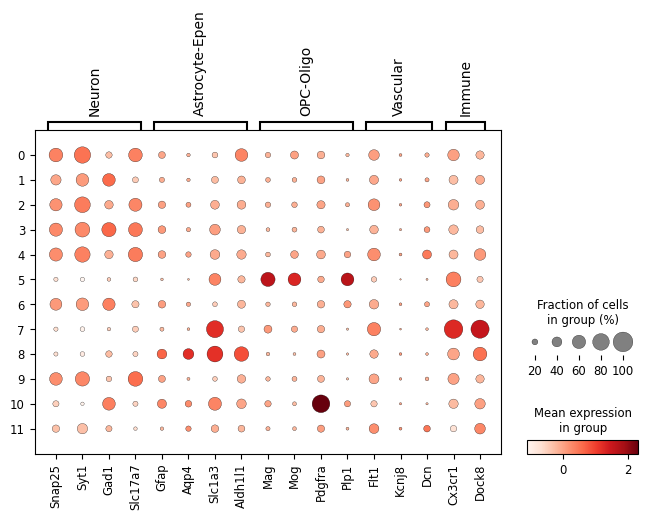

In [21]:
marker_genes_dict = {
    "Neuron": ["Snap25", "Syt1", "Gad1", "Slc17a7"],
    "Astrocyte-Epen": ["Gfap", "Aqp4", "Slc1a3", "Aldh1l1"],
    "OPC-Oligo": ["Mag", "Mog", "Pdgfra", "Plp1"],
    "Vascular": ["Flt1", "Kcnj8", "Dcn"],
    "Immune": ["Cx3cr1", "Dock8"]
}
sc.pl.dotplot(query, marker_genes_dict, "leiden_"+str(best_res), dendrogram=False)


In [ ]:
snap.pl.umap(query,color= "leiden",marker_size=2)

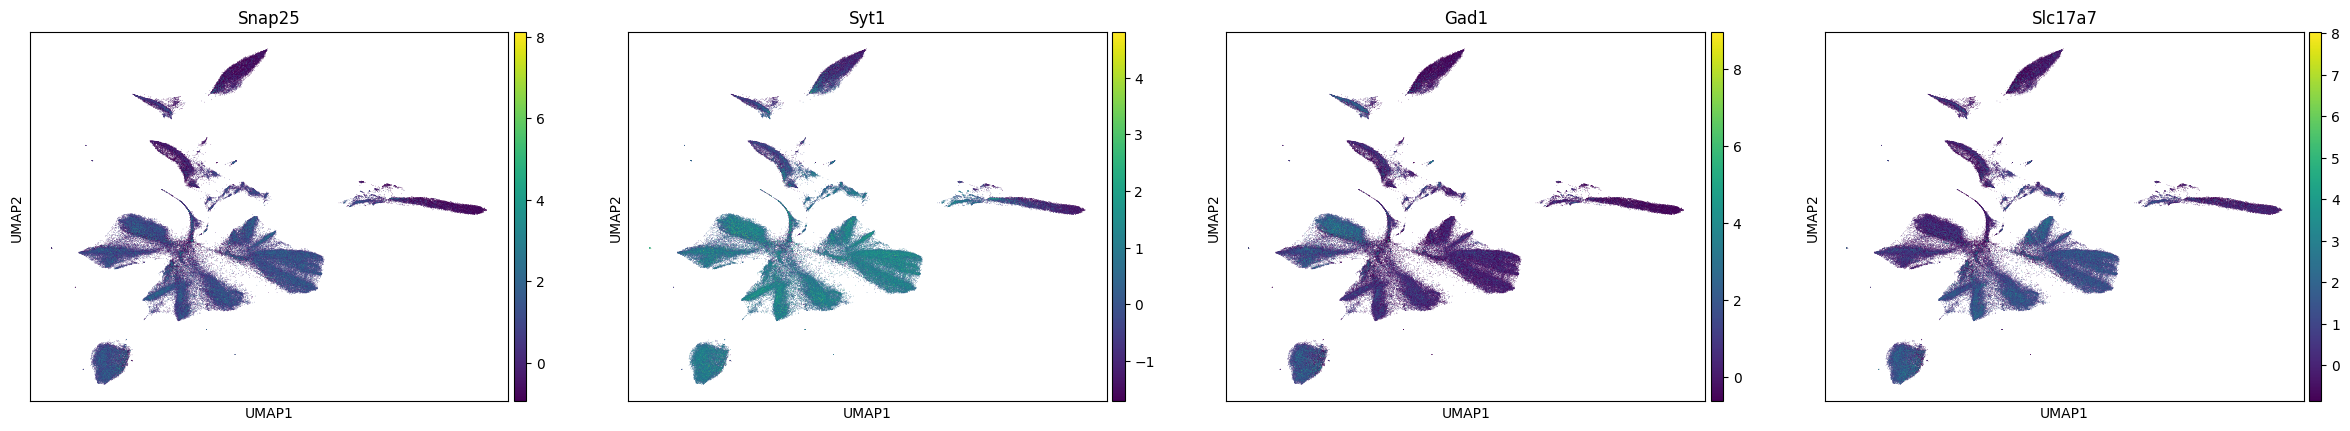

In [64]:
sc.pl.umap(query,color=marker_genes_dict['Neuron'])

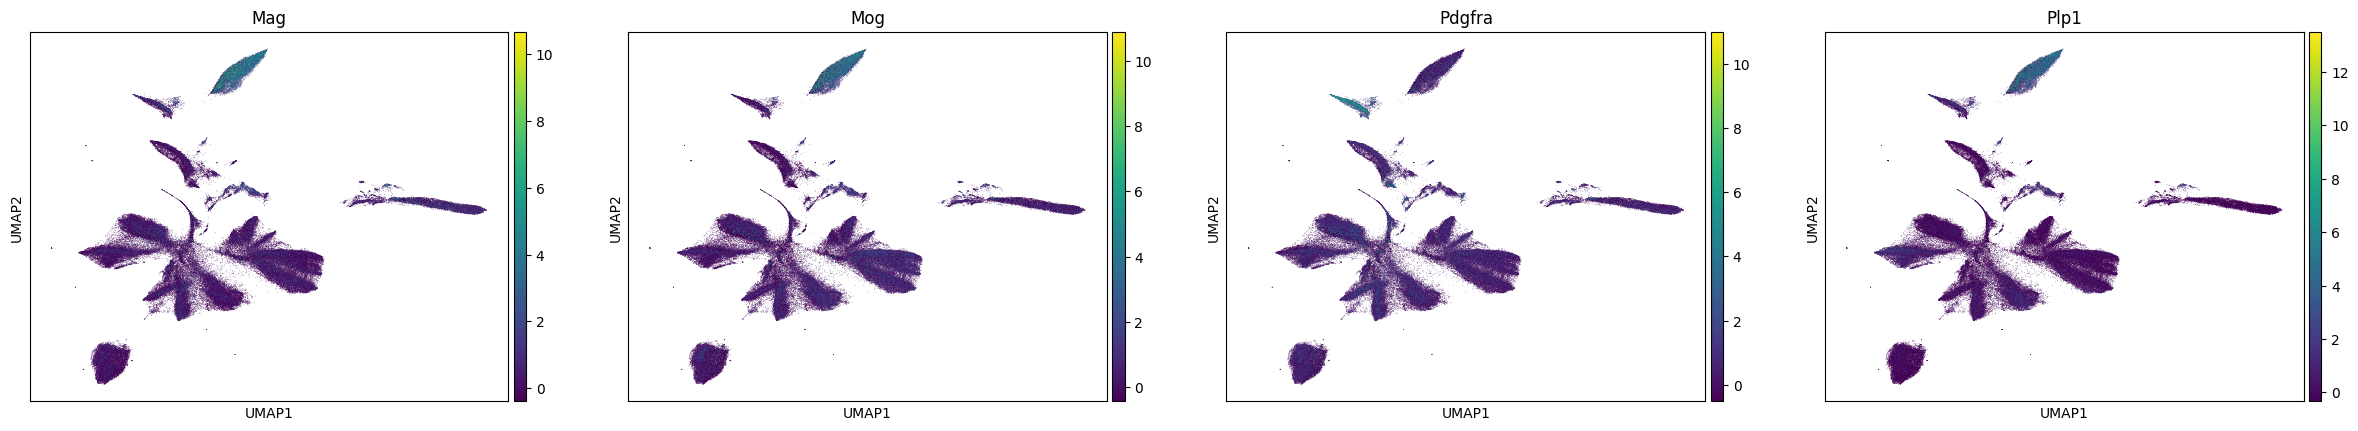

In [65]:
sc.pl.umap(query,color=marker_genes_dict['OPC-Oligo'])

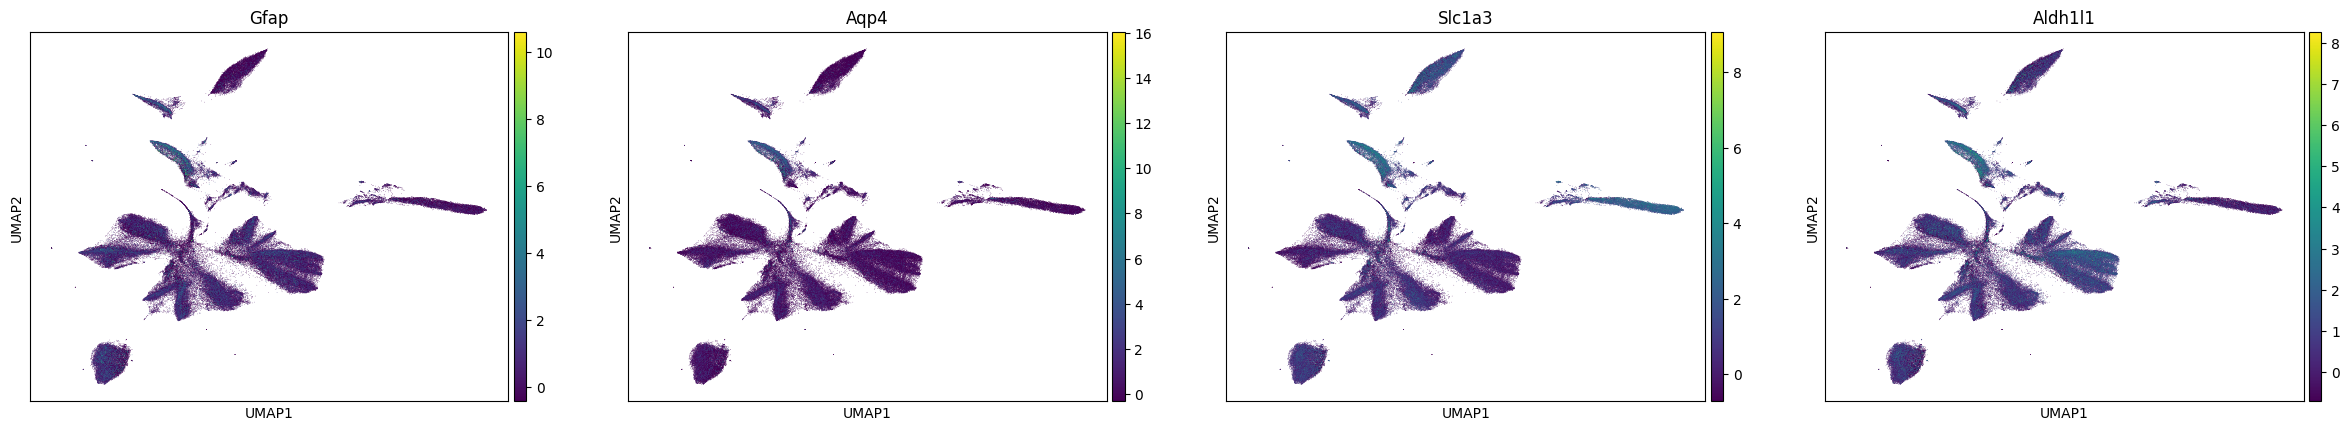

In [66]:
sc.pl.umap(query,color=marker_genes_dict['Astrocyte-Epen'])

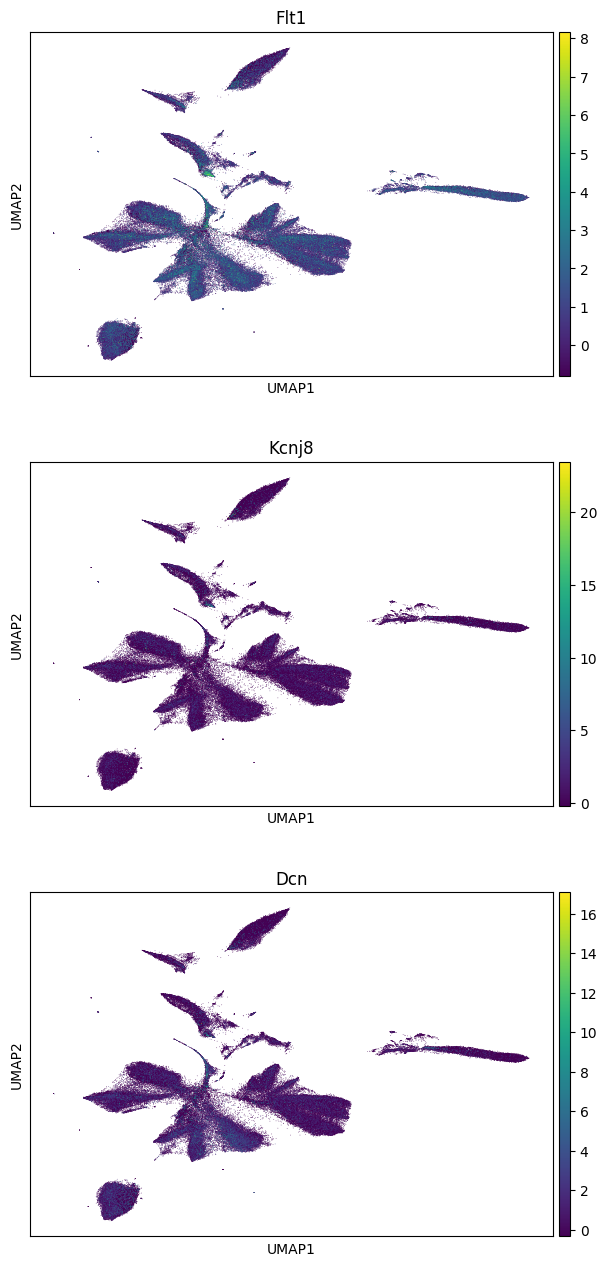

In [72]:

sc.pl.umap(query,color=marker_genes_dict['Vascular'],ncols=1,size=1)

In [ ]:
# query.obs.to_csv('/data2st1/junyi/output/atac0416/3REGIONS_meta_refined.csv')

In [ ]:
# query.write_h5ad('/data2st1/junyi/output/atac0416/3REGIONS_gene.h5ad')

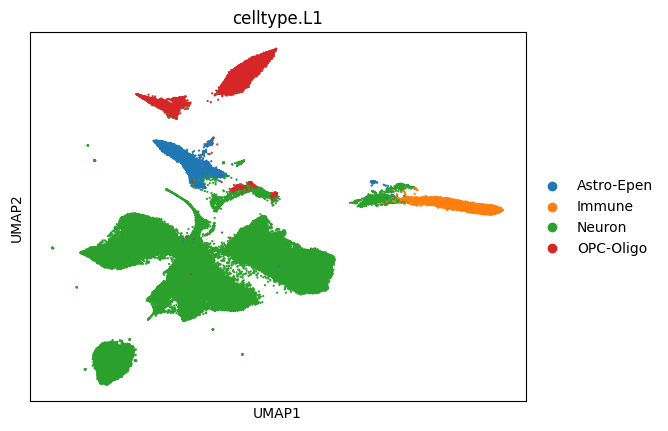

In [145]:
snap.pl.umap(query,color='celltype.L1',size=10)

TypeError: render_plot() got an unexpected keyword argument 'size'

In [23]:
query.obs['celltype.L1.old'] = query.obs['celltype.L1']

In [24]:
# query.obs['celltype.L1'] = 'Neuron'
# query.obs.loc[query.obs.leiden=='10','celltype.L1'] =  'Astro-Epen'
# query.obs.loc[query.obs.leiden=='11','celltype.L1'] =  'OPC-Oligo'
# query.obs.loc[query.obs.leiden=='6','celltype.L1'] =  'OPC-Oligo'
# query.obs.loc[query.obs.leiden=='9','celltype.L1'] =  'Immune'


query.obs['celltype.L1'] = 'Neuron'
query.obs.loc[query.obs['leiden_0.5']=='8','celltype.L1'] =  'Astro-Epen'
query.obs.loc[query.obs['leiden_0.5']=='10','celltype.L1'] =  'OPC-Oligo'
query.obs.loc[query.obs['leiden_0.5']=='5','celltype.L1'] =  'OPC-Oligo'
query.obs.loc[query.obs['leiden_0.5']=='7','celltype.L1'] =  'Immune'



... storing 'celltype.L1' as categorical


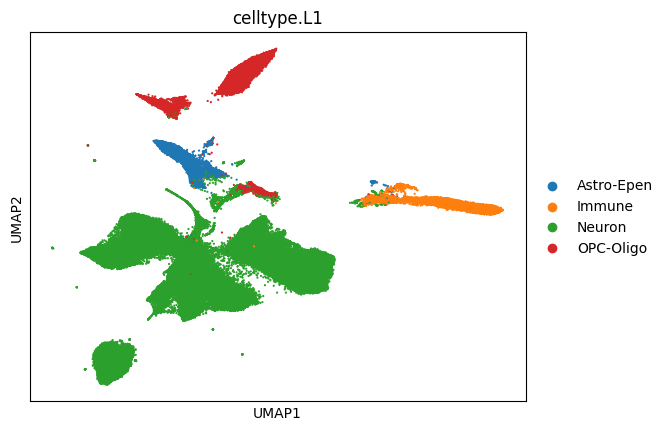

In [25]:
sc.pl.umap(query,color='celltype.L1',ncols=1,size=10)

In [126]:
query.write_h5ad('/data2st1/junyi/output/atac0416/3REGIONS_gene.h5ad')

In [ ]:
query.obs['Region'] = query.obs['sample'].str.split("_").str[1]


In [134]:
query.obs['Condition']=query.obs['sample'].str[:2]

In [142]:
set(query.obs['sample'])

{'MC25A_PFC',
 'MC37A_AMY',
 'MC39C_HIP',
 'MC48D_HIP',
 'MC50B_AMY',
 'MC50B_HIP',
 'MC50B_PFC',
 'MC52E_AMY',
 'MC52E_PFC',
 'MW26A_PFC',
 'MW45A_HIP',
 'MW47A_AMY',
 'MW47A_HIP',
 'MW47A_PFC',
 'MW51A_AMY',
 'MW51A_HIP',
 'MW51A_PFC'}

In [144]:
for region in query.obs['Region'].unique():
    adata_region = query[query.obs['Region'] == region]
    adata_neuron = adata_region[adata_region.obs['celltype.L1'] == 'Neuron']
    adata_neuron.write_h5ad(f'/data2st1/junyi/output/atac0416/3REGIONS_gene_{region}_Neuron.h5ad')

    adata_nn = adata_region[~(adata_region.obs['celltype.L1'] == 'Neuron')]
    adata_nn.write_h5ad(f'/data2st1/junyi/output/atac0416/3REGIONS_gene_{region}_NN.h5ad')

/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'Region' as categorical
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'Condition' as categorical
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'Region' as categorical
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

... storing 'Condition' as categorical
/home/junyichen/anaconda3/envs/sna

In [ ]:
# file = '/data2st1/junyi/output/atac0416/3REGIONS_peak.h5ads'
# pm = sc.read_h5ad(file)

In [ ]:
# pm.obs[pm.obs['celltype.L1']=="Immune"]

,sample,leiden,celltype.L2,leiden_tile,celltype.L1,region,Neurotransmitter_celltype,region_nt,celltype.L3,celltype.L4,expriment
MC37A_AMY:AAACGAAAGGGTAGTC-1,MC37A_AMY,9,Immune,9,Immune,AMY,NN,NN,Immune-0,Immune-0-0,MC
MC37A_AMY:AAACTCGAGGATTAAC-1,MC37A_AMY,9,Immune,9,Immune,AMY,NN,NN,Immune-0,Immune-0-0,MC
MC37A_AMY:AAAGATGGTGGTAAGC-1,MC37A_AMY,9,Immune,9,Immune,AMY,NN,NN,Immune-0,Immune-0-0,MC
MC37A_AMY:AAAGGATAGAATAGTC-1,MC37A_AMY,9,Immune,9,Immune,AMY,NN,NN,Immune-0,Immune-0-0,MC
MC37A_AMY:AAAGGGCAGTCTGGGA-1,MC37A_AMY,9,Immune,9,Immune,AMY,NN,NN,Immune-0,Immune-0-0,MC
...,...,...,...,...,...,...,...,...,...,...,...
MW26A_PFC:TTTGGCCGTGGACAGT-1,MW26A_PFC,9,Immune,9,Immune,PFC,NN,NN,Immune-0,Immune-0-0,MW
MW26A_PFC:TTTGGCCTCATGCTTT-1,MW26A_PFC,9,Immune,9,Immune,PFC,NN,NN,Immune-0,Immune-0-0,MW
MW26A_PFC:TTTGGTTAGCAGAAAG-1,MW26A_PFC,9,Immune,9,Immune,PFC,NN,NN,Immune-0,Immune-0-0,MW
MW26A_PFC:TTTGGTTAGTTCCCGG-1,MW26A_PFC,9,Immune,9,Immune,PFC,NN,NN,Immune-0,Immune-0-0,MW


In [ ]:
# pm.obs.loc[pm.obs.leiden==15,"celltype.L1"] = "Immune"
# pm.obs.loc[pm.obs.leiden==15,"Neurotransmitter_celltype"] = "NN"
# pm.obs.loc[pm.obs.leiden==15,"region_nt"] = "NN"
# pm.obs.loc[pm.obs.leiden==15,"celltype.L2"] = "Immune"
# pm.obs.loc[pm.obs.leiden==15,"celltype.L3"] = "Immune-0"
# pm.obs.loc[pm.obs.leiden==15,"celltype.L4"] = "Immune-0-0"

In [44]:
# pm.write_h5ad('/data2st1/junyi/output/atac0416/3REGIONS_peak.h5ads')

In [ ]:
%%time
snap.pp.mnc_correct(data, batch="sample")
snap.pp.harmony(data, batch="sample", max_iter_harmony=20)


In [ ]:
snap.pp.select_features(data, n_features=250000)


In [ ]:
snap.tl.spectral(data)


In [ ]:
snap.tl.umap(data)


In [ ]:
snap.pp.knn(data)
snap.tl.leiden(data)


In [ ]:
snap.pl.umap(data, color='leiden', interactive=False, height=500)


In [ ]:
import pandas as pd
df_meta = pd.read_csv("output/merged-all-pfc-annotated.csv",index_col=0)

In [ ]:
df_meta=df_meta.loc[df_meta.batch=="atac"]

In [ ]:
df_meta.index = df_meta.index.str.split("_").str[1].str.split("-3").str[0]

In [ ]:
df_meta.dropna(axis=1,how="all",inplace=True)

In [ ]:
data.obs = data.obs.merge(df_meta,left_index=True,right_index=True,how="left")

In [ ]:
data.obs

In [ ]:
snap.pl.umap(data, color='celltype.L1', interactive=False, height=500)


In [ ]:
gene_matrix = snap.pp.make_gene_matrix(data, snap.genome.GRCm39)


In [ ]:
data.obs['predicted_doublet'].fillna('False',inplace=True)
data.obs["predicted_doublet"] = data.obs["predicted_doublet"].astype(bool)
data.obs['PassBasicQC'] = data.obs["PassBasicQC"].astype(bool)

In [ ]:
data.write_h5ad("output/atac_snapatac2.h5ad")

In [ ]:
data.obs['celltype.L1'] = data.obs['celltype.L1'].cat.add_categories('Unknown')
data.obs['celltype.L1'].fillna('Unknown', inplace=True)


In [ ]:
snap.tl.macs3(data, groupby='celltype.L1')


In [ ]:
peaks = snap.tl.merge_peaks(data.uns['macs3'], snap.genome.GRCm39)
peaks.head()


In [ ]:
peak_mat = snap.pp.make_peak_matrix(data, use_rep=peaks['Peaks'])
peak_mat


In [ ]:
marker_peaks = snap.tl.marker_regions(peak_mat, groupby='celltype.L1', pvalue=0.05)


In [ ]:
marker_peaks['Astro-Epen']

In [ ]:
snap.pl.regions(peak_mat, groupby='celltype.L1', peaks=marker_peaks, interactive=False)


In [ ]:
marker_peaks

In [ ]:
from snapatac2._snapatac2 import read_motifs, PyDNAMotif

def cis_bp_mouse(unique: bool = True , path="data/motifdb/Mus_musculus.meme") -> list[PyDNAMotif]:
    motifs = read_motifs(path)
    for motif in motifs:
        motif.name = motif.id.split('+')[0]
    if unique:
        unique_motifs = {}
        for motif in motifs:
            name = motif.name
            if (
                    name not in unique_motifs or 
                    unique_motifs[name].info_content() < motif.info_content()
               ):
               unique_motifs[name] = motif
        motifs = list(unique_motifs.values())
    return motifs


In [ ]:
motifs = snap.tl.motif_enrichment(
    motifs=cis_bp_mouse(unique=True,path="data/motifdb/Mus_musculus.meme"),
    regions=marker_peaks,
    genome_fasta=snap.genome.GRCm39,
)


In [ ]:
import polars as pl

In [ ]:
filtered_motifs = {}
for celltype, celltype_motifs in motifs.items():
    celltyoen_motifs = motifs[celltype]
    filtered = celltyoen_motifs.sort(["adjusted p-value","log2(fold change)"],descending=[False,True]).head(100)
    filtered_motifs[celltype] = filtered

In [ ]:
snap.pl.motif_enrichment(motifs, max_fdr=0.0001, height=4000, interactive=False)

In [ ]:
motifs = snap.tl.motif_enrichment(
    motifs=cis_bp_mouse(unique=True,path="data/motifdb/HOCOMOCOv11_full_MOUSE_mono_meme_format.meme"),
    regions=marker_peaks,
    genome_fasta=snap.genome.GRCm39,
)


In [ ]:
fig = snap.pl.motif_enrichment(motifs, max_fdr=0.0001, height=4000, interactive=False)
with open('figures/motif_hocomoco.png', 'wb') as f:
    f.write(fig.data)  # Assuming 'im.data' contains the image data


In [ ]:
motifs = snap.tl.motif_enrichment(
    motifs=cis_bp_mouse(unique=True,path="data/motifdb/cisBP_mouse.meme"),
    regions=marker_peaks,
    genome_fasta=snap.genome.GRCm39,
)
fig = snap.pl.motif_enrichment(motifs, max_fdr=0.0001, height=4000, interactive=False)
with open('figures/cisbp_pld.png', 'wb') as f:
    f.write(fig.data)  # Assuming 'im.data' contains the image data
